# Predicting NBA Salaries using a Neural Network

Stats Collected:
- Age
- Draft Position
- Games Started
- Games Played
- Minutes per Game
- Points per Game
- Field Goal Percentage
- 3-Point Percentage
- Free Throw Percentage
- Offensive Rebounds per Game
- Defensive Rebounds per Game
- Assists per Game
- Blocks per Game
- Steals per Game
- Turnovers per Game

In [301]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from models.nn import NeuralNetwork
import random

Reading Data from CSV

In [302]:
data_file = open("NBA Player Stats - 3.csv")
data_file.readline()

player_data = []
for line in data_file:
    data = line.split(",")
    for i in range(2, len(data)):
        data[i] = float(data[i])
    # player = (data[0:2], np.array(data[2:-1]), np.array(data[-1]))
    # player = (data[0:2], np.array(data[2:3] + data[4:-1]), np.array(data[-1]))
    player = (data[0:2], np.array(data[2:-1]), np.array(data[-1]))
    player_data.append(player)

Normalizing data

In [303]:
min_vals = player_data[0][1].copy()
max_vals = player_data[0][1].copy()


for player in player_data:
    for i in range(len(player[1])):
        if player[1][i] < min_vals[i]:
            min_vals[i] = player[1][i]
        if player[1][i] > max_vals[i]:
            max_vals[i] = player[1][i]

range_vals = [max_vals[i] - min_vals[i] for i in range(len(min_vals))]

for player in player_data:
    for i in range(len(player[1])):
        player[1][i] = (player[1][i] - min_vals[i]) / range_vals[i]


Shuffling players and dividing into training and testing sets

In [304]:
random.shuffle(player_data)

train_percent = 0.8
train_cutoff = int(len(player_data) * train_percent)
train_data = player_data[0:train_cutoff]
test_data = player_data[train_cutoff:]

train_names = [player[0] for player in train_data]
train_input = [player[1] for player in train_data]
train_salary = [player[2] for player in train_data]
test_names = [player[0] for player in test_data]
test_input = [player[1] for player in test_data]
test_salary = [player[2] for player in test_data]

In [305]:
def loss(network, d_input, d_output):
    assert len(d_input) == len(d_output)
    predictions = network.predict(d_input)
    n = len(d_input)
    loss = 0
    for i in range(n):
        loss += (predictions[i] - d_output[i]) ** 2
    return loss / n

In [306]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=4, layer_sizes=[30, 30, 30, 30])

print("initial training loss", loss(network, train_input, train_salary)[0])
print("initial testing loss", loss(network, test_input, test_salary)[0])

initial training loss 506.6511968946949
initial testing loss 332.95117241548456


training loss 53.28177280255356
testing loss 48.57491398975308


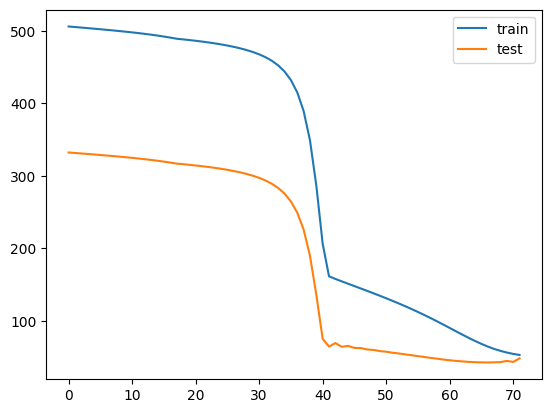

In [307]:
rates = (np.array([0.005, 0.004, 0.003, 0.002, 0.001]), np.array([0.001, 0.0008, 0.0006, 0.0004, 0.0002]))

rounds = 72
train_loss = []
test_loss = []

for i in range(int(rounds / 4)):
    network.train(train_input, train_salary, 2 * rates[0], 2 * rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

for i in range(3 * int(rounds / 4)):
    network.train(train_input, train_salary, rates[0], rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

print("training loss", train_loss[-1][0])
print("testing loss", test_loss[-1][0])

plt.plot(range(rounds), train_loss, label="train")
plt.plot(range(rounds), test_loss, label="test")
plt.legend()

In [309]:
predictions = network.predict(test_input)
print("Testing Data Set")
for i in range(len(predictions)):
    print(f"{test_names[i][0]}, {test_names[i][1]} ({round(predictions[i][0] - test_salary[i], 1)}):")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {test_salary[i]}")

Testing Data Set
Mitchell Robinson, Knicks (-3.3):
	 predicted salary: 12.4, actual salary: 15.7
Jaylen Brown, Celtics (4.7):
	 predicted salary: 35.4, actual salary: 30.7
Draymond Green, Warriors (-2.2):
	 predicted salary: 25.4, actual salary: 27.6
Josh Hart, Knicks (3.1):
	 predicted salary: 16.1, actual salary: 13.0
Kyle Anderson, Twolves (5.8):
	 predicted salary: 15.0, actual salary: 9.2
Jeff Green, Nuggets (6.5):
	 predicted salary: 11.0, actual salary: 4.5
Jevon Carter, Bucks (1.8):
	 predicted salary: 4.0, actual salary: 2.2
Kentavious Caldwell-Pope, Nuggets (-1.6):
	 predicted salary: 13.1, actual salary: 14.7
Bojan Bogdanovic, Pistons (7.6):
	 predicted salary: 27.6, actual salary: 20.0
Rui Hachimura, Lakers (1.9):
	 predicted salary: 8.2, actual salary: 6.3
Jalen Brunson, Knicks (0.6):
	 predicted salary: 26.9, actual salary: 26.3
Anthony Edwards, Twolves (17.8):
	 predicted salary: 31.3, actual salary: 13.5
Christian Braun, Nuggets (-0.7):
	 predicted salary: 2.2, actual s